In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded=files.upload()

Saving ushape.csv to ushape.csv


In [4]:
import pandas as pd
df = pd.read_csv('ushape.csv')
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


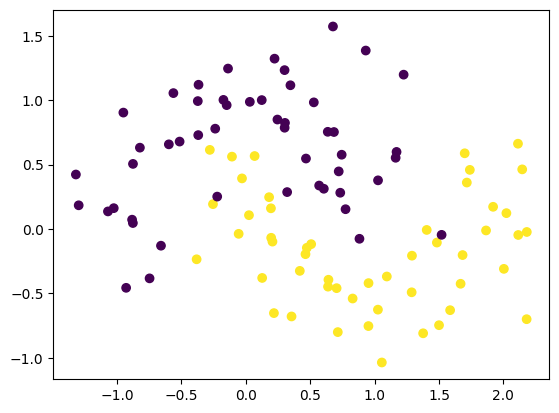

In [5]:
plt.scatter(df['X'], df['Y'],c=df['class'])

In [6]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [7]:
model= Sequential()
model.add(Dense(10,activation='tanh', input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 470 (1.84 KB)

 Trainable params: 470 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.get_weights()

[array([[-0.395754  ,  0.4680249 ,  0.23712152, -0.46310908, -0.05227524,
         -0.06875718,  0.5823489 , -0.37332937, -0.45800728,  0.54182416],
        [ 0.09608167, -0.22507969, -0.14863527,  0.47953707,  0.5334708 ,
          0.26255667, -0.6272164 , -0.23835713, -0.31856123, -0.23261991]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.4290108 ,  0.18226284,  0.25334942, -0.24605653,  0.20027262,
         -0.5035868 , -0.15996048, -0.4225406 , -0.20431861, -0.449811  ],
        [ 0.4619398 , -0.41485855, -0.31156144, -0.1930705 , -0.04477978,
          0.25200075, -0.3597382 , -0.04092163, -0.19817409,  0.23220563],
        [-0.51648885, -0.3943032 , -0.01209867, -0.06694332,  0.30592215,
          0.37477165, -0.3823794 ,  0.53743184,  0.13737959,  0.24575424],
        [ 0.5050839 , -0.22041571,  0.104972  , -0.3195625 ,  0.04532176,
          0.20461321, -0.10721734, -0.12539247, -0.2553743 , -0.41077155],
        [-0.36044

In [9]:
initial_weights=model.get_weights()

In [10]:
# Get the shapes of existing weights from the model
shapes = [w.shape for w in model.get_weights()]

# Initialize empty list for new weights
initial_weights = []

# Fill weights using He initialization and biases with zeros
for i, shape in enumerate(shapes):
    if len(shape) == 2:  # it's a weight matrix
        fan_in = shape[0]
        weight = np.random.randn(*shape) * np.sqrt(1. / fan_in)
        initial_weights.append(weight)
    elif len(shape) == 1:  # it's a bias vector
        bias = np.zeros(shape)
        initial_weights.append(bias)

In [11]:
initial_weights[0]=np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)
initial_weights[2]=np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[1]=np.zeros(model.get_weights()[3].shape)
initial_weights[4]=np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[1]=np.zeros(model.get_weights()[5].shape)
initial_weights[6]=np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[1]=np.zeros(model.get_weights()[7].shape)
initial_weights[8]=np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[1]=np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[-0.7929945 ,  1.1557822 , -0.16437848,  0.6468819 , -1.5365838 ,
          0.2199675 ,  0.8771266 , -0.14798222, -0.17611659,  1.0206671 ],
        [-1.1555213 ,  0.46534687,  0.01368593,  1.6529431 , -0.050275  ,
          0.78486276,  0.06187599,  0.23378438,  0.5435366 ,  0.53769803]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-3.4287024e-01,  7.1796298e-02, -7.6194805e-01,  2.8514999e-01,
          2.6540610e-01,  5.1391657e-02, -1.8119642e-01, -1.4353223e-01,
         -8.3549976e-01, -3.5940596e-01],
        [-3.2447559e-01, -2.1750363e-02,  1.4124997e-01,  2.1651825e-01,
         -5.4347509e-01, -1.0836154e-01, -1.8765102e-01, -7.2795767e-01,
         -2.1574113e-03,  6.3321546e-02],
        [-3.1734070e-01, -6.3732308e-01, -1.9559547e-01,  1.0884210e-01,
         -4.4033299e-03, -5.9385628e-01,  1.4528030e-01, -2.3311467e-01,
          5.3827864e-01, -4.3415073e-01],
        [ 3.5755411e-01,  2.2149944e-01,  3.89444

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history=model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.2609 - loss: 2.2821 - val_accuracy: 0.2000 - val_loss: 2.2328
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2906 - loss: 2.1728 - val_accuracy: 0.2000 - val_loss: 2.1769
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3352 - loss: 2.1079 - val_accuracy: 0.3000 - val_loss: 2.1216
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4008 - loss: 2.0611 - val_accuracy: 0.3500 - val_loss: 2.0674
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4414 - loss: 2.0498 - val_accuracy: 0.4000 - val_loss: 2.0156
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5195 - loss: 1.9541 - val_accuracy: 0.5000 - val_loss: 1.9645
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5437 - loss: 1.9544 - val_accuracy: 0.5500 - val_loss: 1.9147
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6133 - loss: 1.8762 - val_accuracy: 0.6000 - val_loss

In [16]:
model.get_weights()

[array([[-0.66853327,  1.1058866 , -0.2017026 ,  0.568598  , -1.4319713 ,
          0.07714144,  0.8479824 , -0.28353792, -0.28971487,  0.91417724],
        [-1.2526273 ,  0.55728984,  0.06725063,  1.6289855 ,  0.01729886,
          0.86042696, -0.10770422,  0.27488425,  0.6038658 ,  0.6082507 ]],
       dtype=float32),
 array([-0.20930357,  0.07749094, -0.18382856, -0.12498219, -0.10731863,
         0.00897354,  0.03669679, -0.167738  ,  0.2051539 ,  0.23855726],
       dtype=float32),
 array([[-0.25547653,  0.11136065, -0.66827196,  0.3637719 ,  0.37155995,
          0.11941749, -0.30675104, -0.20829763, -0.74216694, -0.43682763],
        [-0.45223746, -0.02890882,  0.02440763,  0.17912841, -0.55493605,
         -0.07439201, -0.0888674 , -0.6842608 , -0.05133658,  0.09228227],
        [-0.20763914, -0.606197  , -0.06743079,  0.3086018 ,  0.21996719,
         -0.39779845,  0.00433491, -0.3413473 ,  0.684629  , -0.5802705 ],
        [ 0.2877805 ,  0.18499316,  0.32779998,  0.11425055, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

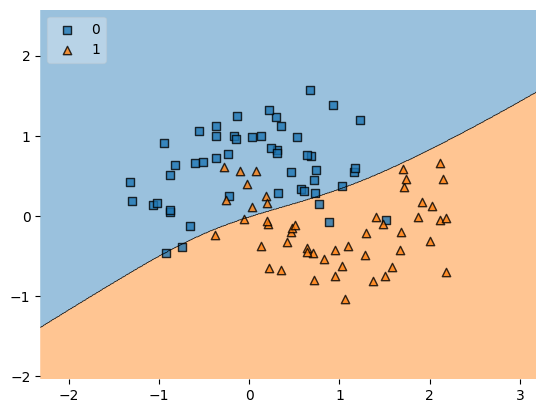

In [17]:
from mlxtend.plotting import plot_decision_regions
class KerasModelWrapper:
    def __init__(self, keras_model):
        self.model = keras_model

    def predict(self, X):
        probs = self.model.predict(X)
        return np.argmax(probs, axis=1)  # Return class labels

# Instantiate wrapper
wrapped_model = KerasModelWrapper(model)

# Now plot (make sure X has only 2 features!)
plot_decision_regions(X, y.astype('int'), clf=wrapped_model, legend=2)
